In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [3]:
train_df = pd.DataFrame.from_csv('train.tsv', sep='\t')

/home/mayankgupta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [4]:
train_df.head()

,SentenceId,Phrase,Sentiment
PhraseId,,,
1,1,A series of escapades demonstrating the adage ...,1
2,1,A series of escapades demonstrating the adage ...,2
3,1,A series,2
4,1,A,2
5,1,series,2


In [5]:
train_df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156060 entries, 1 to 156060
Data columns (total 3 columns):
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
train_df.describe()

,SentenceId,Sentiment
count,156060.000000,156060.000000
mean,4079.732744,2.063578
std,2502.764394,0.893832
min,1.000000,0.000000
25%,1861.750000,2.000000
50%,4017.000000,2.000000
75%,6244.000000,3.000000
max,8544.000000,4.000000


In [8]:
train_df['text length'] = train_df['Phrase'].apply(lambda line: len(line.split()))

In [9]:
train_df.head()

,SentenceId,Phrase,Sentiment,text length
PhraseId,,,,
1,1,A series of escapades demonstrating the adage ...,1,37
2,1,A series of escapades demonstrating the adage ...,2,14
3,1,A series,2,2
4,1,A,2,1
5,1,series,2,1


In [10]:
sentiment =  train_df.groupby('Sentiment').mean()

In [11]:
sentiment.corr()

,SentenceId,text length
SentenceId,1.000000,0.924146
text length,0.924146,1.000000


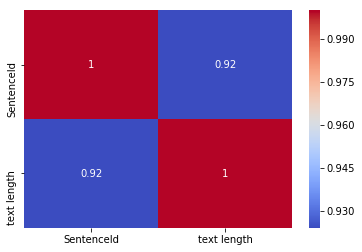

In [12]:
sns.heatmap(sentiment.corr(), cmap='coolwarm', annot=True)

In [13]:
# review_class = train_df[(train_df.Sentiment == 0) | (train_df.Sentiment == 4) ]

In [14]:
X = train_df['Phrase']
Y = train_df['Sentiment']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv = CountVectorizer(analyzer=text_process)

In [30]:
# print(tfidf_transformer.transform('This is a string, now fuck off!')))    

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156060 entries, 1 to 156060
Data columns (total 4 columns):
SentenceId     156060 non-null int64
Phrase         156060 non-null object
Sentiment      156060 non-null int64
text length    156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.0+ MB


In [21]:
bow_transformer = cv.fit(train_df['Phrase'])
print
phrases_bow = bow_transformer.transform(train_df['Phrase'])
tfidf_transformer = TfidfTransformer().fit(phrases_bow)
phrases_tfidf = tfidf_transformer.transform(phrases_bow)

In [25]:
X = phrases_tfidf
Y = train_df['Phrase']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [29]:
nb.fit(X_train,y_train)

MemoryError: 

In [ ]:
predictions = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print('Somehting')

In [ ]:
print('Before confusion matrix')
print(confusion_matrix(y_test,predictions))
print('After confusion matrix')
print('\n')
print('Before Classification report')
print(classification_report(y_test,predictions))
print('After Classification report')

In [27]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [31]:
X = train_df['Phrase']
Y = train_df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3)

In [32]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [33]:
predictions = pipeline.predict(X_test)

In [34]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   64   851  1203    26     0]
 [   34  2005  5941   197     0]
 [   13   966 21449  1459    18]
 [    0   113  5856  3752    55]
 [    0     7   987  1698   124]]
             precision    recall  f1-score   support

          0       0.58      0.03      0.06      2144
          1       0.51      0.25      0.33      8177
          2       0.61      0.90      0.72     23905
          3       0.53      0.38      0.44      9776
          4       0.63      0.04      0.08      2816

avg / total       0.57      0.59      0.53     46818

